## CSE676: Deep Learning 
### Project: Sentiment analysis on IMDb Movie Reviews dataset
### Sanchit Krishna Anandraj , Abhinandan Vijan , Satvik Singh

## Importing relevant libaries to perform cleaning and EDA steps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from collections import Counter

## Reading data from a csv file and store it in a pandas data frame.

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

## Data Statistics

In [3]:
df.shape

(50000, 2)

In [4]:
df.dtypes

review       object
sentiment    object
dtype: object

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## Handling mising data

In [7]:
missing_data = df.isnull().sum()
print(missing_data)

review       0
sentiment    0
dtype: int64


In [8]:

print(df['review'].duplicated().sum())

418


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [10]:
df.shape

(49582, 2)

## Encoding the target column

In [11]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## Visualizing sentiment distribution

In [13]:
pos_count = df['sentiment'].eq(1).sum()
neg_count = df['sentiment'].eq(0).sum()

print("positive sentiment count",  pos_count )
print("negative sentiment count",  neg_count )


positive sentiment count 24884
negative sentiment count 24698


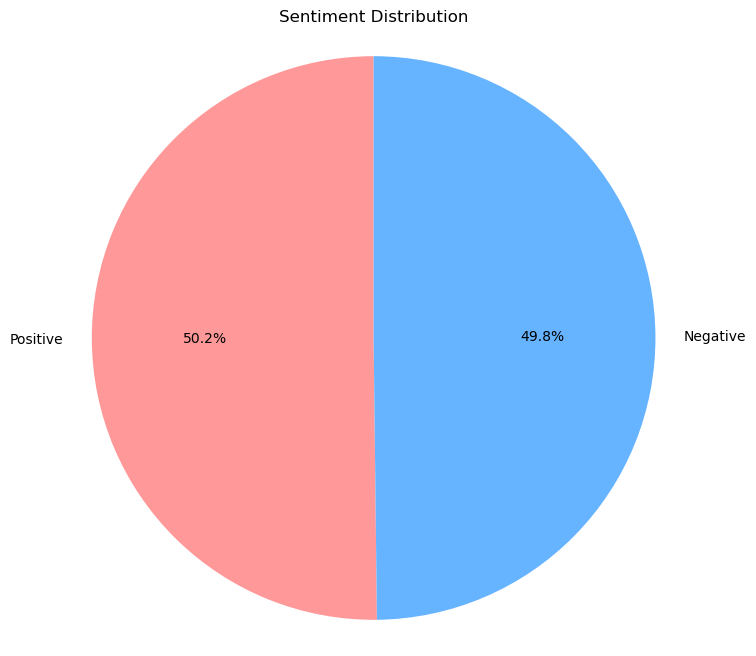

In [14]:
# Calculate the value counts for each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors= ['#ff9999','#66b3ff'])
plt.title('Sentiment Distribution')
plt.axis('equal') 
plt.show()


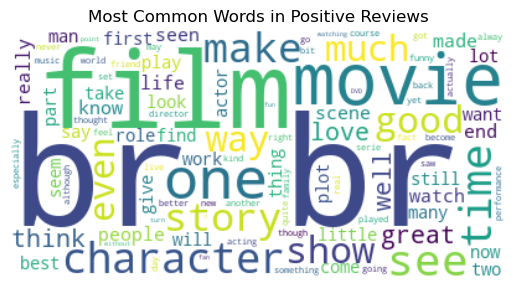

In [15]:
positive_reviews = df[df['sentiment'] == 1]
positive_text = ' '.join(positive_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

In [16]:

positive_text = ' '.join(positive_reviews['review'])
word_counts = Counter(positive_text.split())

common_words = word_counts.most_common(100)

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,290932
1,and,165372
2,a,155251
3,of,148673
4,to,127921
...,...,...
95,think,6493
96,do,6377
97,two,6130
98,make,6101


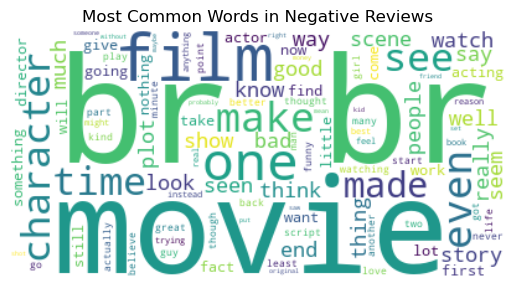

In [17]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
wordcloud = WordCloud(max_words=100, background_color='white').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [18]:
negative_reviews = df[df['sentiment'] == 0]
negative_text = ' '.join(negative_reviews['review'])
word_counts = Counter(negative_text.split())

common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization (optional)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df



,Word,Frequency
0,the,273542
1,a,149568
2,and,134388
3,of,132924
4,to,131974
...,...,...
95,think,6486
96,too,6327
97,being,6196
98,its,6157


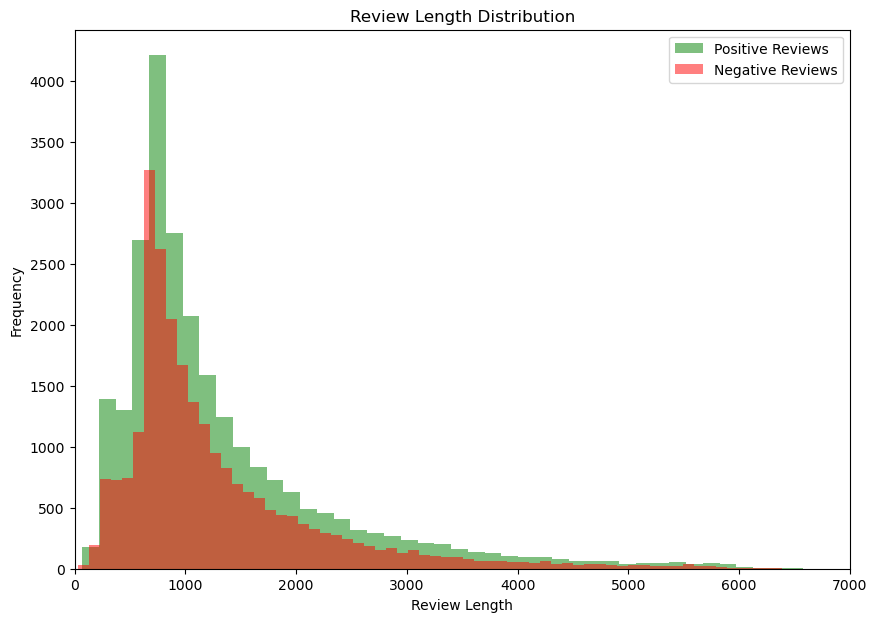

In [19]:
df['review_length'] = df['review'].apply(len)

positive_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]

# Plot histograms for positive and negative reviews in a single plot
plt.figure(figsize=(10, 7))
plt.hist(positive_reviews['review_length'], bins=90, color='green', alpha=0.5, label='Positive Reviews')
plt.hist(negative_reviews['review_length'], bins=90, color='red', alpha=0.5, label='Negative Reviews')

plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.legend()
plt.show()

## Splitting the dataset 

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [21]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('random_forest', (RandomForestClassifier(n_estimators=10, criterion='entropy')))      
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      4927
           1       0.80      0.70      0.75      4990

    accuracy                           0.76      9917
   macro avg       0.76      0.76      0.76      9917
weighted avg       0.76      0.76      0.76      9917



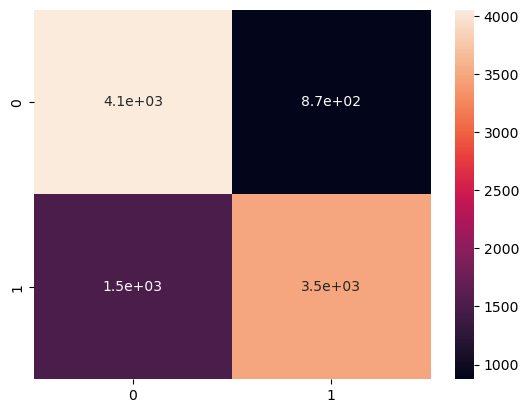

In [22]:
import seaborn as sns
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [23]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('NB', MultinomialNB())      
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4927
           1       0.88      0.82      0.84      4990

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



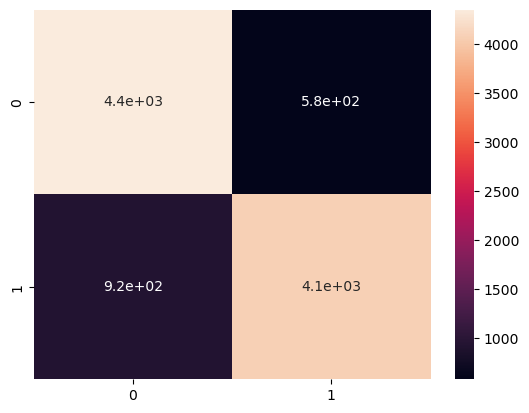

In [24]:
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()

# LSTM - Long Short Term Memory Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state=42)

In [27]:
train_data.shape

(39665, 3)

In [28]:
tokenizer = Tokenizer(num_words = 5000) #Most common 7000 words
tokenizer.fit_on_texts(train_data["review"])

In [29]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [30]:
X_train

array([[   0,    0,    0, ...,  352,  202,  134],
       [   0,    0,    0, ..., 4247,    2, 2721],
       [ 138,   14, 2503, ...,  414,   25,  195],
       ...,
       [2277,   93,   33, ...,    3,  454,  156],
       [   0,    0,    0, ...,  244,  103,  126],
       [   0,    0,    0, ...,    4,    1, 2902]], dtype=int32)

In [31]:
X_test

array([[   0,    0,    0, ...,    7,  235,  156],
       [1355,    2, 3531, ...,   37,   11,   27],
       [ 366, 1706, 4682, ...,    1, 3979, 2796],
       ...,
       [   7,    1,   19, ...,    7,    7,    7],
       [   0,    0,    0, ...,    1,  308,  316],
       [   0,    0,    0, ...,   81,   14,  666]], dtype=int32)

In [32]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [33]:
Y_test

29171    0
43589    1
38712    0
16045    0
5248     1
        ..
2923     1
15292    0
17849    0
38079    0
2691     0
Name: sentiment, Length: 9917, dtype: int64

In [34]:
Y_train

7837     0
4814     0
35458    1
3446     0
24478    0
        ..
11304    0
45059    0
38405    0
860      1
15838    1
Name: sentiment, Length: 39665, dtype: int64

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_shape=(200,)))  # input_shape specified here
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/sanchitkrishna/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 105s 210ms/step - accuracy: 0.7148 - loss: 0.5403 - val_accuracy: 0.8356 - val_loss: 0.3880
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 112s 226ms/step - accuracy: 0.8583 - loss: 0.3518 - val_accuracy: 0.8055 - val_loss: 0.4282
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 107s 215ms/step - accuracy: 0.8690 - loss: 0.3286 - val_accuracy: 0.8555 - val_loss: 0.3468
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 111s 223ms/step - accuracy: 0.8948 - loss: 0.2719 - val_accuracy: 0.8652 - val_loss: 0.3303
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 109s 219ms/step - accuracy: 0.8966 - loss: 0.2648 - val_accuracy: 0.7715 - val_loss: 0.5005
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 108s 217ms/step - accuracy: 0.8861 - loss: 0.2760 - val_accuracy: 0.8678 - val_loss: 0.3317
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 110s 222ms/step - accuracy: 0.9121 - loss: 0.2220 - val_accuracy: 0.8736 - val_loss: 0.3331


In [39]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss: ",loss)
print("Accuracy: ",accuracy)

310/310 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8633 - loss: 0.3249
Loss:  0.3284975290298462
Accuracy:  0.8610466718673706


In [40]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [41]:
predictive_system("This movie was good and I liked it")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


'positive'

In [42]:
predictive_system("Boring and sleepy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'negative'

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52      4939
           1       0.50      0.47      0.49      4978

    accuracy                           0.50      9917
   macro avg       0.50      0.50      0.50      9917
weighted avg       0.50      0.50      0.50      9917



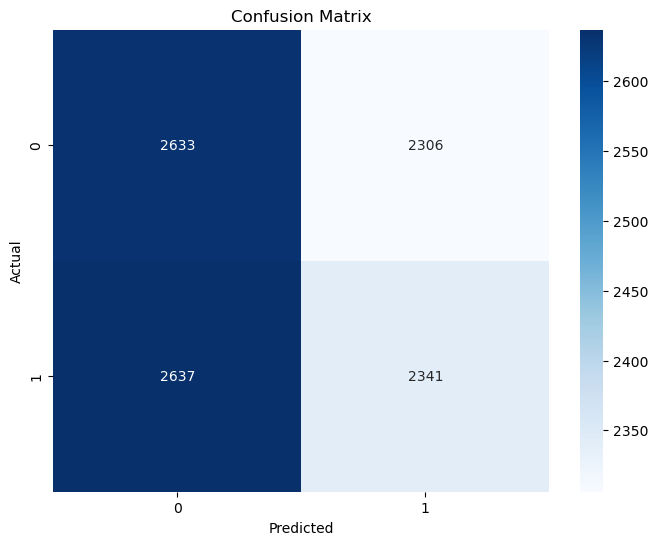

In [43]:
import seaborn as sns

print('Classification Report:\n', classification_report(Y_test, Y_pred))

# Plotting confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

310/310 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


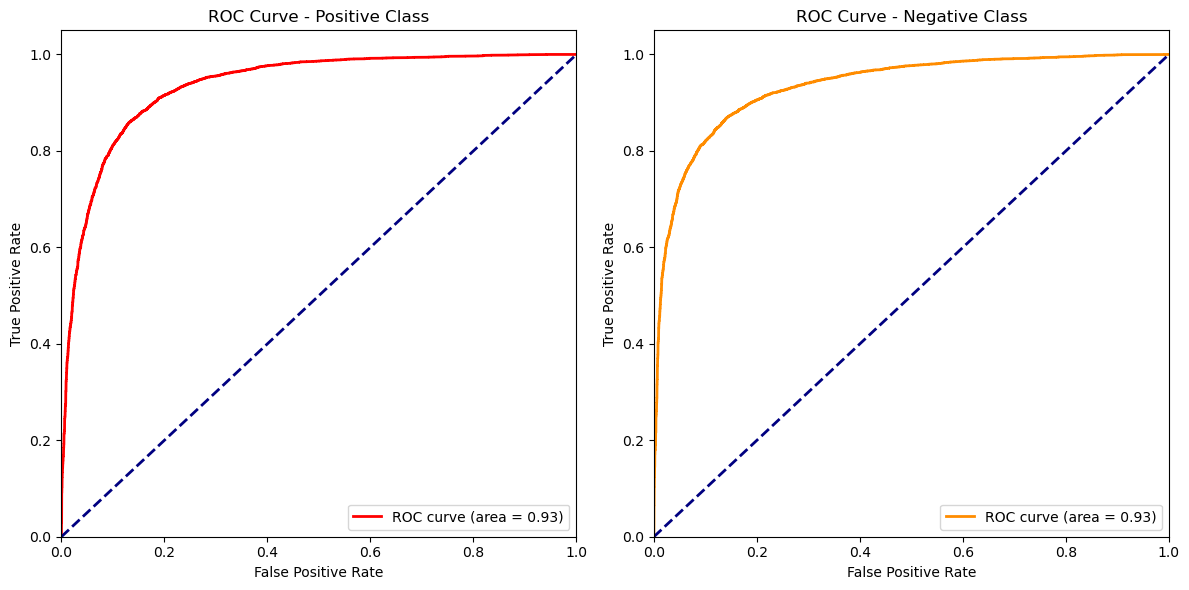

In [44]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
Y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for positive class
fpr_pos, tpr_pos, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc_pos = auc(fpr_pos, tpr_pos)

# Compute ROC curve and ROC area for negative class
fpr_neg, tpr_neg, _ = roc_curve(1 - Y_test, 1 - Y_pred_prob)
roc_auc_neg = auc(fpr_neg, tpr_neg)

# Plot ROC curves
plt.figure(figsize=(12, 6))

# Positive class
plt.subplot(1, 2, 1)
plt.plot(fpr_pos, tpr_pos, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pos)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Positive Class')
plt.legend(loc="lower right")

# Negative class
plt.subplot(1, 2, 2)
plt.plot(fpr_neg, tpr_neg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_neg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Negative Class')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

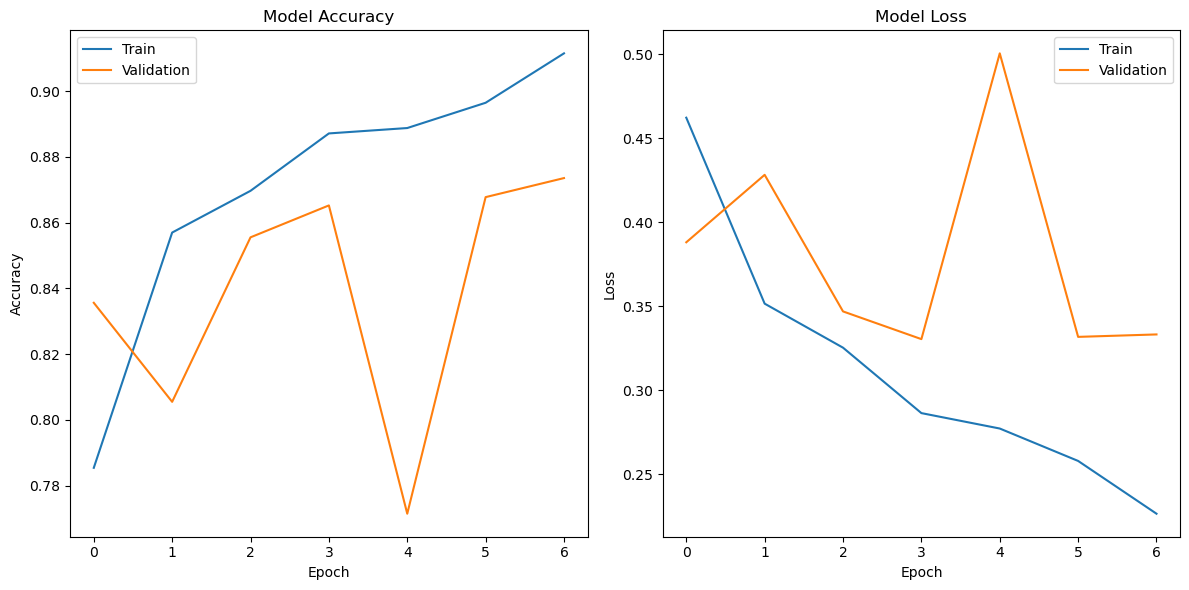

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

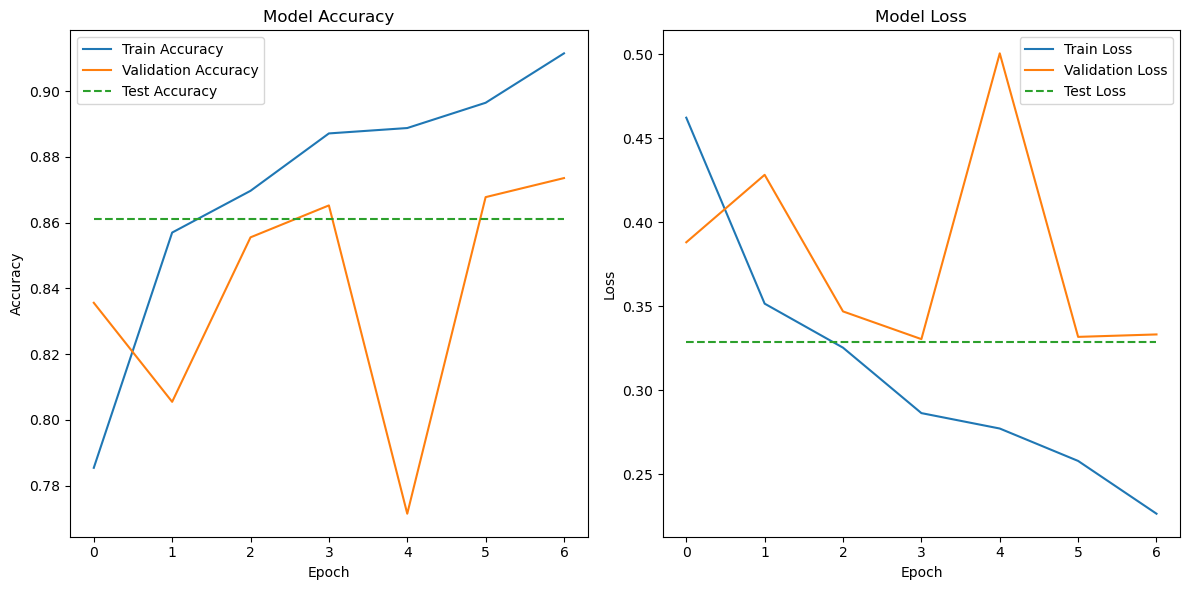

In [46]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

# Add test metrics to history for plotting
history.history['test_loss'] = [test_loss] * len(history.history['loss'])
history.history['test_accuracy'] = [test_accuracy] * len(history.history['accuracy'])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['test_accuracy'], label='Test Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['test_loss'], label='Test Loss', linestyle='--')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
